In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 

## Read data

We read the Iris dataset and put it in a pandas dataframe. 

In [3]:
iris_data = pd.read_csv('Iris.csv')

## Summarize dataset


Yo can get an idea how many data points/records (rows) and attributes/features (columns) your dataset has with *iris_data.shape()*: 

In [4]:
print(iris_data.shape)

(150, 6)


In [5]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_setosa=iris_data.loc[iris_data["Species"]=="Iris-setosa"]
iris_virginica=iris_data.loc[iris_data["Species"]=="Iris-virginica"]
iris_versicolor=iris_data.loc[iris_data["Species"]=="Iris-versicolor"]

In [7]:
print(iris_setosa.shape)
print(iris_virginica.shape)
print(iris_versicolor.shape)

(50, 6)
(50, 6)
(50, 6)


## Drop *id* and *Species*


In [8]:
iris_data.drop(['Id','Species'],axis=1,inplace=True)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# K-means and K-means++ clustering

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans_output = kmeans.fit(iris_data)

In [10]:
kmeans_output.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2,
       3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3], dtype=int32)

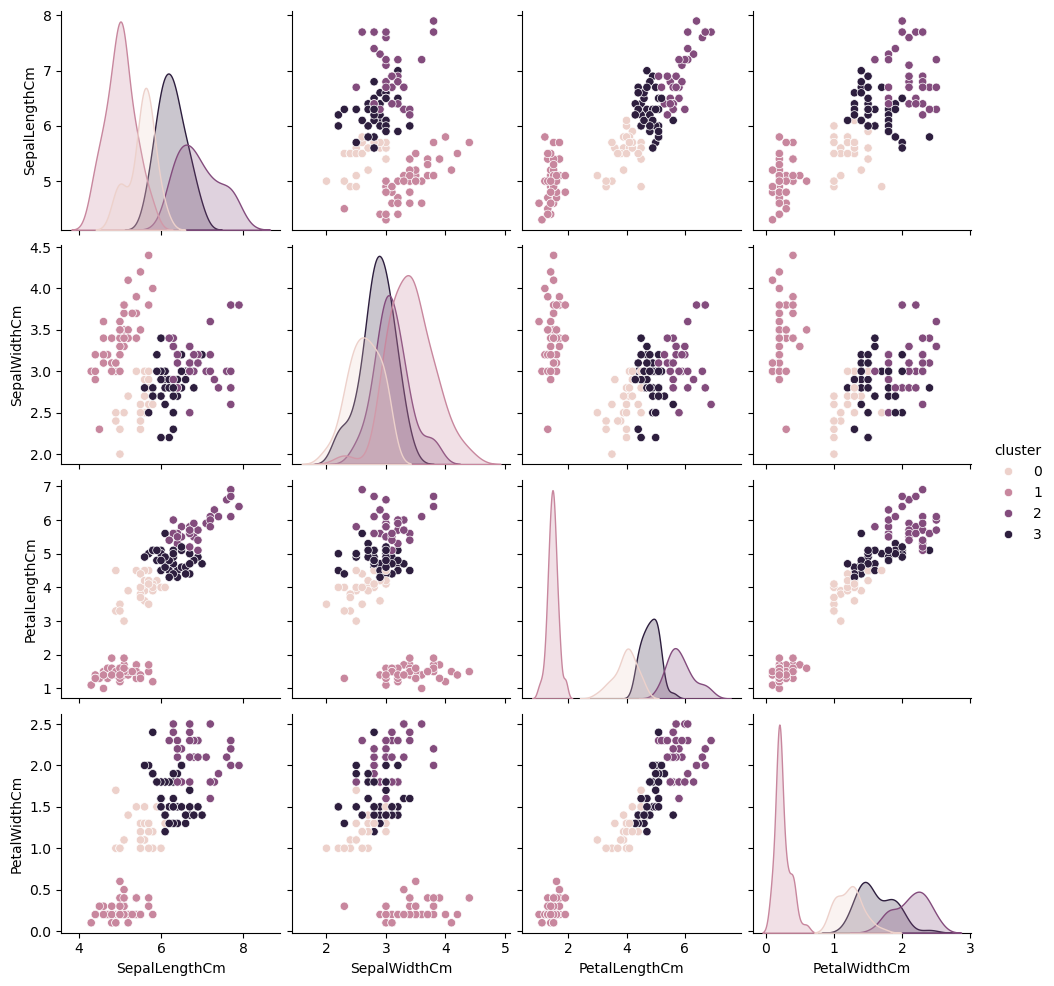

In [11]:
sns.color_palette("pastel")


iris_data["cluster"] = kmeans_output.labels_.tolist()

sns.pairplot(iris_data,hue= "cluster");
plt.show()

# Determining the optimum value of K (Elbow method)

In [12]:
#Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris_data)
    wcss.append(kmeans.inertia_)

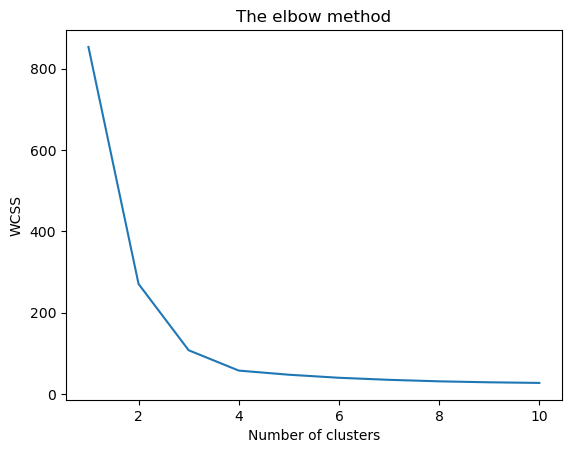

In [13]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# -------------------------------------------------------------------------------------------------------

# DBSCAN: Density based spatial clustering of applications with noise

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [15]:
iris_data = pd.read_csv('Iris.csv')

iris_data.drop(['Id','Species'],axis=1,inplace=True)


In [16]:
dbscan = DBSCAN(eps = 0.42, min_samples = 7)
dbscan_output = dbscan.fit_predict(iris_data)

### Noisy samples are given the label -1

In [17]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  2,  1,  2,  1, -1,  1,  2, -1,  2, -1,  2, -1,  1,  2,  2,
       -1,  2,  6,  2,  4,  2,  1,  1,  1,  1,  2, -1,  2,  2,  2,  4,  2,
       -1,  1, -1,  2,  2,  2,  1,  2, -1,  2,  2,  2,  1, -1,  2, -1,  6,
        3, -1,  3, -1, -1, -1, -1, -1,  5,  5,  3, -1, -1,  5,  5, -1, -1,
       -1,  3, -1, -1,  4,  3, -1,  4,  4, -1, -1, -1, -1, -1,  4, -1, -1,
       -1,  5,  6,  3,  3,  3,  6,  3,  3,  3,  4,  5, -1,  6])

### Number of clusters

In [18]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [19]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  16,
        17,  19,  20,  21,  23,  25,  26,  27,  28,  29,  30,  31,  34,
        35,  36,  37,  38,  39,  40,  42,  45,  46,  47,  48,  49,  51,
        55,  58,  61,  67,  69,  74,  75,  78,  82,  86,  89,  92,  94,
        95,  96,  99, 120, 123, 124, 139, 140, 143, 147, 149])

In [20]:
len(dbscan.core_sample_indices_)

63

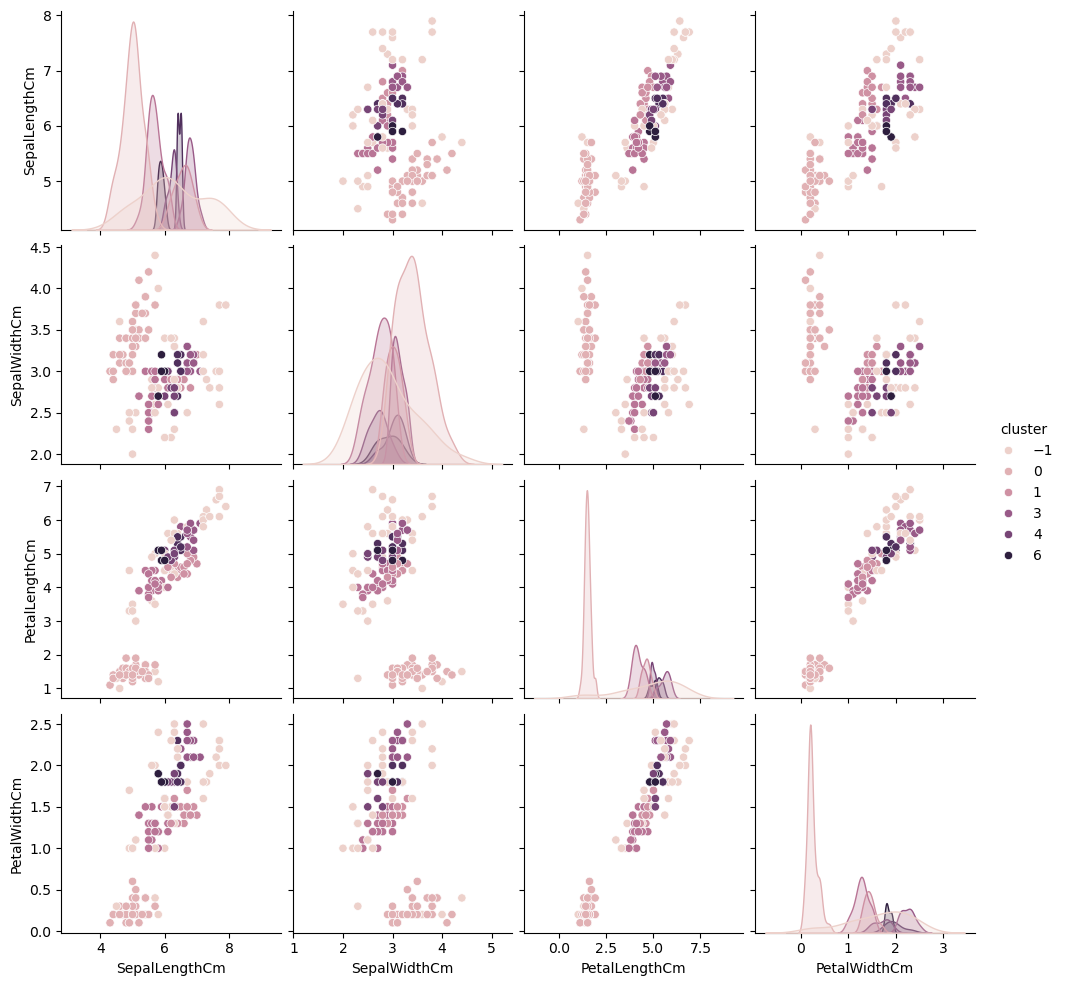

In [21]:
sns.color_palette("pastel")


iris_data["cluster"] = dbscan.labels_.tolist()

sns.pairplot(iris_data,hue= "cluster");
plt.show()

# Estimating Eps and MinPts for DBSCAN

In [22]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [24]:
iris_data = pd.read_csv('Iris.csv')

iris_data.drop(['Id','Species'],axis=1, inplace=True)

In [25]:
neighbors = NearestNeighbors(n_neighbors = 5)
neighbors_fit = neighbors.fit(iris_data)
distances, indices = neighbors_fit.kneighbors(iris_data)


distances = distances[:,4]
indices = indices[:,4]
distances = np.sort(distances)


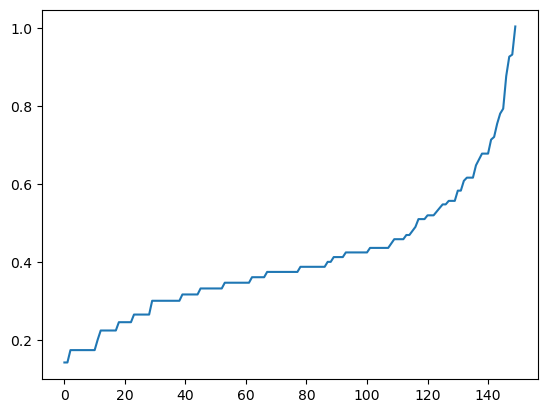

In [26]:
plt.plot(distances)
plt.show()

### Apply clustering on the EV Charging dataset Downloaded from Kaggle.

- 1. Apply K-Means, K-Means++, and DBSCAN algorithms. 
- 2. Determine the optimal value of k (number of clusters) for K-Means and K-Means++ using the Elbow Method. 
- 3. Find the optimal value of eps (epsilon) for DBSCAN using the Elbow Method as well.



In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA


In [79]:
# Load the dataset
data = pd.read_csv("ev_battery_charging_data.csv")

# Select numerical features for clustering
X = data.select_dtypes(include=[np.number])

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [80]:
# Reduce data to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

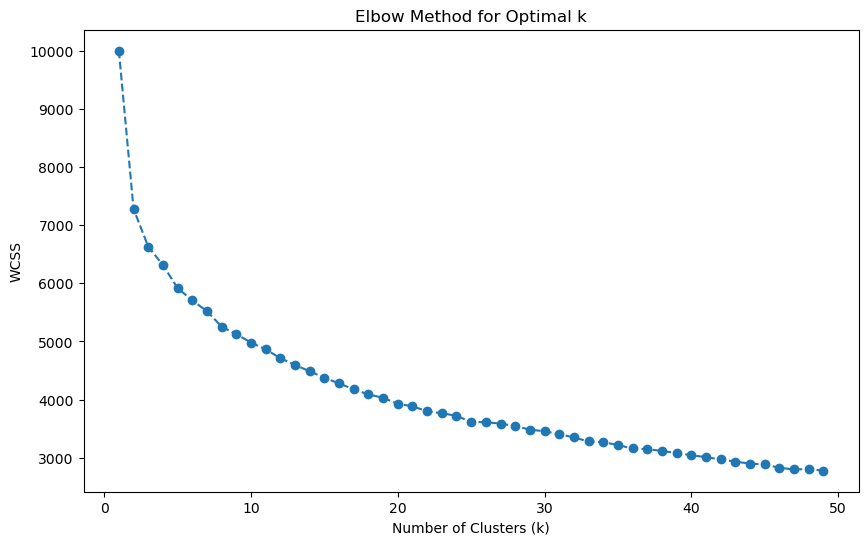

In [81]:

# Elbow Method for K-Means and K-Means++
wcss = []
k_values = range(1, 50)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()


In [82]:
# Optimal k is the elbow point (e.g., k=3 or k=4)

# Apply K-Means with optimal k
optimal_k = 40  # Replace with the elbow point value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Silhouette Score for K-Means
kmeans_score = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_score}")


K-Means Silhouette Score: 0.13167559114349667


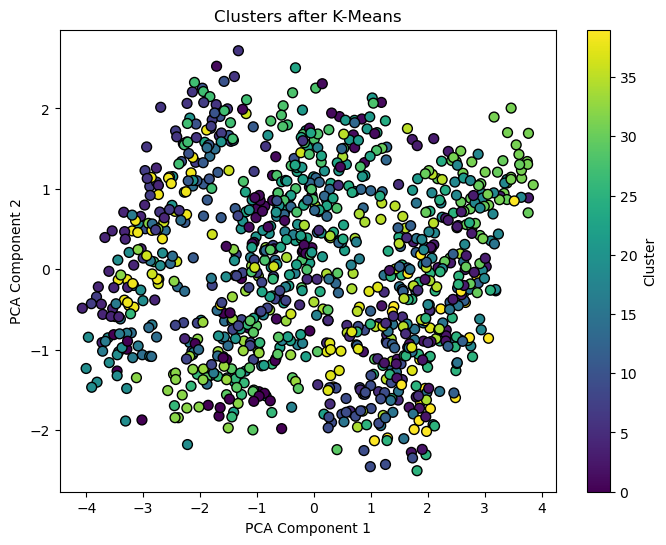

In [83]:
# Plot clusters for K-Means
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, edgecolor='k')
plt.title("Clusters after K-Means")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [84]:
# Count samples in each cluster for K-Means
kmeans_cluster_counts = np.bincount(kmeans_labels)
print("K-Means Cluster Counts:")
for cluster, count in enumerate(kmeans_cluster_counts):
    print(f"Cluster {cluster}: {count} samples")

K-Means Cluster Counts:
Cluster 0: 25 samples
Cluster 1: 40 samples
Cluster 2: 26 samples
Cluster 3: 26 samples
Cluster 4: 25 samples
Cluster 5: 31 samples
Cluster 6: 17 samples
Cluster 7: 20 samples
Cluster 8: 33 samples
Cluster 9: 29 samples
Cluster 10: 12 samples
Cluster 11: 18 samples
Cluster 12: 26 samples
Cluster 13: 26 samples
Cluster 14: 28 samples
Cluster 15: 36 samples
Cluster 16: 18 samples
Cluster 17: 20 samples
Cluster 18: 37 samples
Cluster 19: 23 samples
Cluster 20: 29 samples
Cluster 21: 21 samples
Cluster 22: 27 samples
Cluster 23: 29 samples
Cluster 24: 18 samples
Cluster 25: 40 samples
Cluster 26: 18 samples
Cluster 27: 15 samples
Cluster 28: 34 samples
Cluster 29: 22 samples
Cluster 30: 31 samples
Cluster 31: 25 samples
Cluster 32: 22 samples
Cluster 33: 19 samples
Cluster 34: 25 samples
Cluster 35: 24 samples
Cluster 36: 14 samples
Cluster 37: 21 samples
Cluster 38: 26 samples
Cluster 39: 24 samples


In [87]:

# Apply K-Means++ with optimal k
kmeans_plus = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_plus_labels = kmeans_plus.fit_predict(X_scaled)

# Silhouette Score for K-Means++
kmeans_plus_score = silhouette_score(X_scaled, kmeans_plus_labels)
print(f"K-Means++ Silhouette Score: {kmeans_plus_score}")


K-Means++ Silhouette Score: 0.13167559114349667


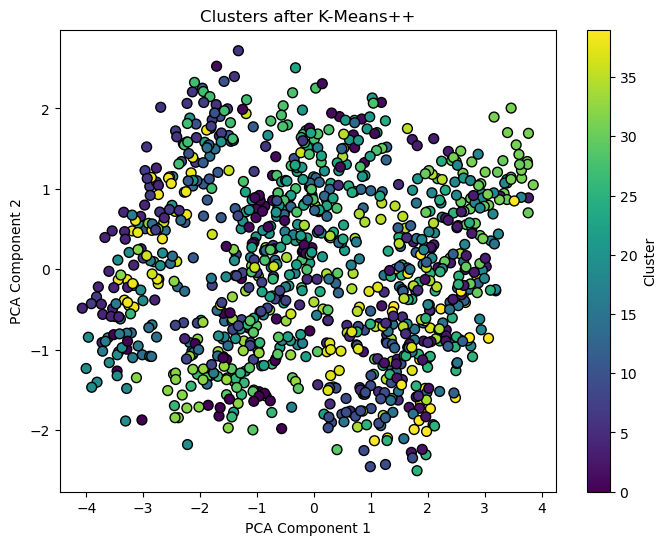

In [88]:
# Plot clusters for K-Means++
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_plus_labels, cmap='viridis', s=50, edgecolor='k')
plt.title("Clusters after K-Means++")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [89]:
# Count samples in each cluster for K-Means++
kmeans_plus_cluster_counts = np.bincount(kmeans_plus_labels)
print("\nK-Means++ Cluster Counts:")
for cluster, count in enumerate(kmeans_plus_cluster_counts):
    print(f"Cluster {cluster}: {count} samples")




K-Means++ Cluster Counts:
Cluster 0: 25 samples
Cluster 1: 40 samples
Cluster 2: 26 samples
Cluster 3: 26 samples
Cluster 4: 25 samples
Cluster 5: 31 samples
Cluster 6: 17 samples
Cluster 7: 20 samples
Cluster 8: 33 samples
Cluster 9: 29 samples
Cluster 10: 12 samples
Cluster 11: 18 samples
Cluster 12: 26 samples
Cluster 13: 26 samples
Cluster 14: 28 samples
Cluster 15: 36 samples
Cluster 16: 18 samples
Cluster 17: 20 samples
Cluster 18: 37 samples
Cluster 19: 23 samples
Cluster 20: 29 samples
Cluster 21: 21 samples
Cluster 22: 27 samples
Cluster 23: 29 samples
Cluster 24: 18 samples
Cluster 25: 40 samples
Cluster 26: 18 samples
Cluster 27: 15 samples
Cluster 28: 34 samples
Cluster 29: 22 samples
Cluster 30: 31 samples
Cluster 31: 25 samples
Cluster 32: 22 samples
Cluster 33: 19 samples
Cluster 34: 25 samples
Cluster 35: 24 samples
Cluster 36: 14 samples
Cluster 37: 21 samples
Cluster 38: 26 samples
Cluster 39: 24 samples


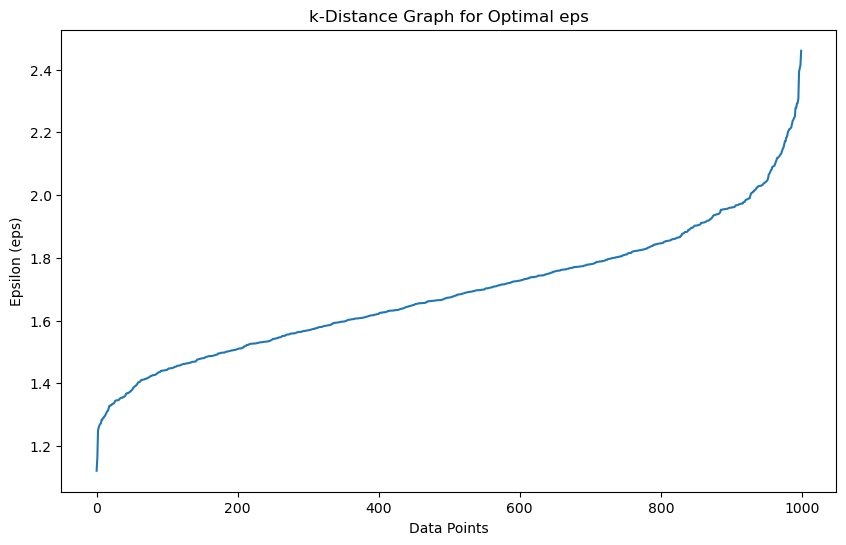

In [90]:
# DBSCAN: Find optimal eps using k-distance graph
neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, -1], axis=0)

# Plot k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("Epsilon (eps)")
plt.title("k-Distance Graph for Optimal eps")
plt.show()


In [109]:


# Optimal eps is the point of maximum curvature (e.g., eps=1.8)

# Apply DBSCAN with optimal eps
optimal_eps = 1.9  # Replace with the elbow point value
dbscan = DBSCAN(eps=optimal_eps, min_samples=6)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Silhouette Score for DBSCAN (excluding noise points)
if len(np.unique(dbscan_labels)) > 1:
    dbscan_score = silhouette_score(X_scaled, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_score}")
else:
    print("DBSCAN could not form clusters.")



DBSCAN Silhouette Score: 0.1350511678482896


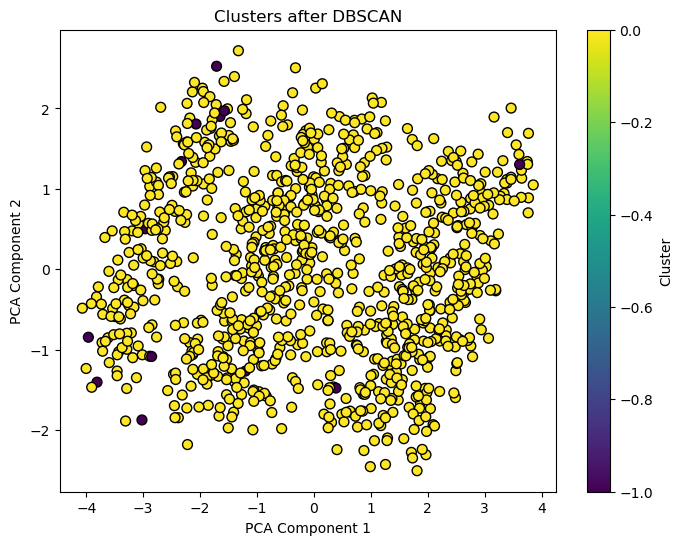

In [110]:

# Plot clusters for DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', s=50, edgecolor='k')
plt.title("Clusters after DBSCAN")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [111]:
# Count samples in each cluster for DBSCAN
dbscan_cluster_counts = pd.Series(dbscan_labels).value_counts().sort_index()
print("\nDBSCAN Cluster Counts:")
for cluster, count in dbscan_cluster_counts.items():
    if cluster == -1:
        print(f"Noise/Outliers: {count} samples")
    else:
        print(f"Cluster {cluster}: {count} samples")



DBSCAN Cluster Counts:
Noise/Outliers: 13 samples
Cluster 0: 987 samples


In [112]:

# Comparison of Results
print("\nComparison of Clustering Algorithms:")
print(f"K-Means Silhouette Score: {kmeans_score}")
print(f"K-Means++ Silhouette Score: {kmeans_plus_score}")
if len(np.unique(dbscan_labels)) > 1:
    print(f"DBSCAN Silhouette Score: {dbscan_score}")
else:
    print("DBSCAN could not form clusters.")


Comparison of Clustering Algorithms:
K-Means Silhouette Score: 0.13167559114349667
K-Means++ Silhouette Score: 0.13167559114349667
DBSCAN Silhouette Score: 0.1350511678482896


### Example 2: Performing clustering on Remaining Useful Life (RUL) data is a common task in predictive maintenance and reliability engineering. The goal is to group similar RUL patterns or degradation profiles to understand the behavior of assets (e.g., machinery, batteries, engines) and predict their failure.

## Steps for RUL Clustering

### 1. Calculate RUL for Each Engine

RUL is the remaining time (in cycles) until an engine fails.

For each engine, RUL can be calculated as:

- RUL = Total Lifetime of Engine - Current Cycle

If the dataset does not explicitly provide the failure point, you may need to infer it based on the last cycle for each engine.

**Example:**

If an engine fails at cycle **200**, then at cycle **100**, its RUL is **100**.

### 2. Feature Selection

Use the sensor measurements and operational settings as features for clustering.

You may also include derived features like:

Rolling averages of sensor readings.

Rate of change (derivatives) of sensor readings.

Cumulative sums of certain sensor values.

#### 3. Normalize the Data

Since sensor measurements may have different scales, normalize the data (e.g., using Min-Max scaling or Z-score normalization) to ensure that all features contribute equally to the clustering process.

### 4. Apply Clustering Algorithms

Use clustering algorithms like K-Means, DBSCAN, or Hierarchical Clustering to group engines based on their sensor data and RUL.

**For example:**

- K-Means: Group engines into k clusters based on their feature similarity.

- DBSCAN: Identify clusters of engines with similar degradation patterns while handling outliers.

### 5. Evaluate Clusters
Use metrics like Silhouette Score or Davies-Bouldin Index to evaluate the quality of the clusters.

Visualize the clusters using techniques like PCA (Principal Component Analysis) or t-SNE to reduce the dimensionality of the data and plot the clusters in 2D or 3D space.

### 6. Interpret the Clusters

Analyze the clusters to understand the patterns:

Engines in the same cluster may have similar degradation trends or RUL.

Identify which sensor measurements are most influential in defining the clusters.

Use this information to develop maintenance strategies for each cluster.

In [113]:
# Load the dataset
data = pd.read_csv('CMaps/train_FD001.txt', sep=" ", header=None)

# Drop unnecessary columns (if any)
data = data.dropna(axis=1)

# Calculate RUL for each engine
max_cycles = data.groupby(0)[1].max()  # Maximum cycle for each engine
data['RUL'] = max_cycles[data[0]].values - data[1]


In [114]:

# Select features for clustering (e.g., sensor measurements)
features = data.iloc[:, 2:26]  # Adjust columns as needed

# Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)



In [115]:
# Reduce data to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_scaled)

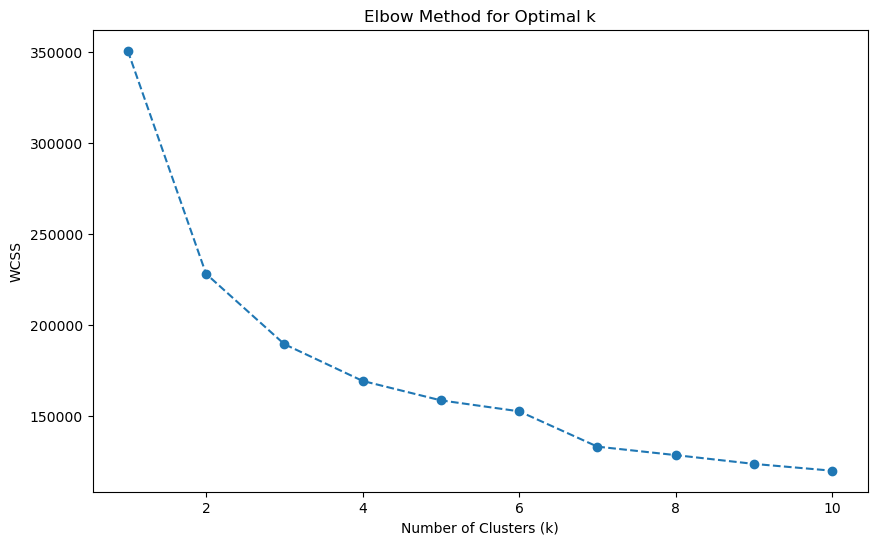

In [116]:

# Elbow Method for K-Means and K-Means++
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

In [117]:
# Optimal k is the elbow point (e.g., k=3 or k=4)

# Apply K-Means with optimal k
optimal_k = 8  # Replace with the elbow point value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)

# Silhouette Score for K-Means
kmeans_score = silhouette_score(features_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_score}")


K-Means Silhouette Score: 0.12990623716065464


In [118]:
# Count samples in each cluster for K-Means
kmeans_cluster_counts = np.bincount(kmeans_labels)
print("K-Means Cluster Counts:")
for cluster, count in enumerate(kmeans_cluster_counts):
    print(f"Cluster {cluster}: {count} samples")

K-Means Cluster Counts:
Cluster 0: 5243 samples
Cluster 1: 3973 samples
Cluster 2: 4981 samples
Cluster 3: 1520 samples
Cluster 4: 406 samples
Cluster 5: 1454 samples
Cluster 6: 2259 samples
Cluster 7: 795 samples


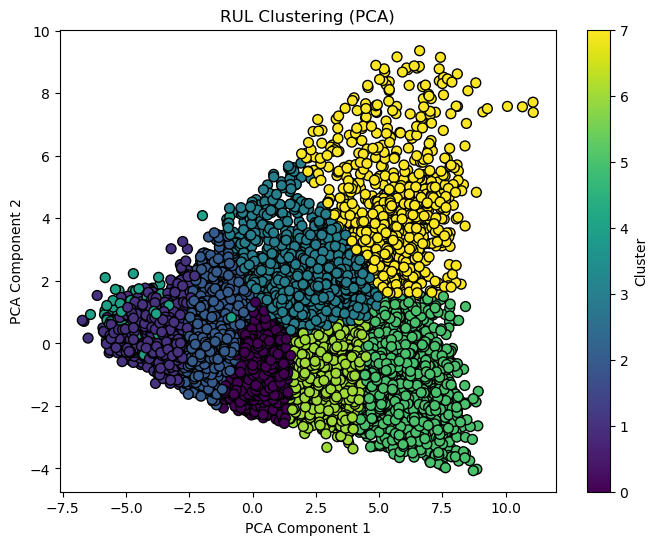

In [119]:
# Plot clusters for K-Means
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, edgecolor='k')
plt.title('RUL Clustering (PCA)')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [120]:

# Apply K-Means++ with optimal k
kmeans_plus = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_plus_labels = kmeans_plus.fit_predict(features_scaled)

# Silhouette Score for K-Means++
kmeans_plus_score = silhouette_score(features_scaled, kmeans_plus_labels)
print(f"K-Means++ Silhouette Score: {kmeans_plus_score}")


K-Means++ Silhouette Score: 0.12990623716065464


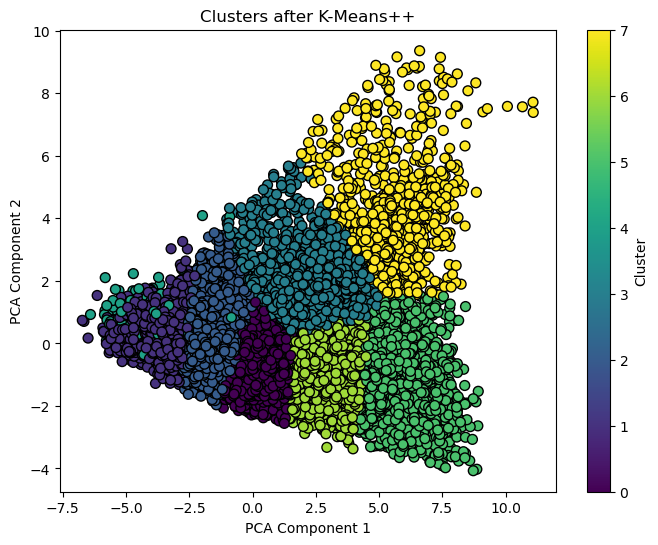

In [121]:
# Plot clusters for K-Means++
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_plus_labels, cmap='viridis', s=50, edgecolor='k')
plt.title("Clusters after K-Means++")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [122]:
# Count samples in each cluster for K-Means++
kmeans_plus_cluster_counts = np.bincount(kmeans_plus_labels)
print("\nK-Means++ Cluster Counts:")
for cluster, count in enumerate(kmeans_plus_cluster_counts):
    print(f"Cluster {cluster}: {count} samples")




K-Means++ Cluster Counts:
Cluster 0: 5243 samples
Cluster 1: 3973 samples
Cluster 2: 4981 samples
Cluster 3: 1520 samples
Cluster 4: 406 samples
Cluster 5: 1454 samples
Cluster 6: 2259 samples
Cluster 7: 795 samples


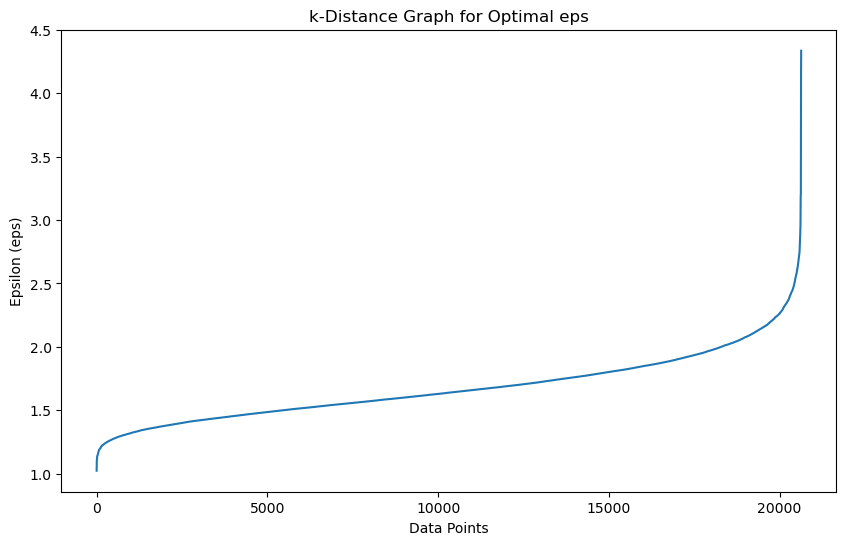

In [123]:
# DBSCAN: Find optimal eps using k-distance graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(features_scaled)
distances, indices = neighbors_fit.kneighbors(features_scaled)
distances = np.sort(distances[:, -1], axis=0)

# Plot k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("Epsilon (eps)")
plt.title("k-Distance Graph for Optimal eps")
plt.show()

In [132]:


# Optimal eps is the point of maximum curvature (e.g., eps=1.8)

# Apply DBSCAN with optimal eps
optimal_eps = 2.2  # Replace with the elbow point value
dbscan = DBSCAN(eps=optimal_eps, min_samples=4)
dbscan_labels = dbscan.fit_predict(features_scaled)

# Silhouette Score for DBSCAN (excluding noise points)
if len(np.unique(dbscan_labels)) > 1:
    dbscan_score = silhouette_score(features_scaled, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_score}")
else:
    print("DBSCAN could not form clusters.")



DBSCAN Silhouette Score: 0.30455054055703945


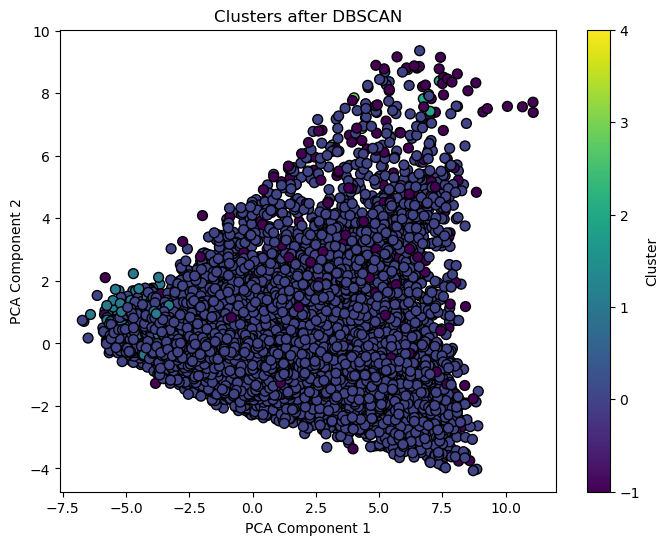

In [133]:

# Plot clusters for DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', s=50, edgecolor='k')
plt.title("Clusters after DBSCAN")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [134]:
# Count samples in each cluster for DBSCAN
dbscan_cluster_counts = pd.Series(dbscan_labels).value_counts().sort_index()
print("\nDBSCAN Cluster Counts:")
for cluster, count in dbscan_cluster_counts.items():
    if cluster == -1:
        print(f"Noise/Outliers: {count} samples")
    else:
        print(f"Cluster {cluster}: {count} samples")



DBSCAN Cluster Counts:
Noise/Outliers: 274 samples
Cluster 0: 19972 samples
Cluster 1: 372 samples
Cluster 2: 5 samples
Cluster 3: 3 samples
Cluster 4: 5 samples


In [128]:

# Comparison of Results
print("\nComparison of Clustering Algorithms:")
print(f"K-Means Silhouette Score: {kmeans_score}")
print(f"K-Means++ Silhouette Score: {kmeans_plus_score}")
if len(np.unique(dbscan_labels)) > 1:
    print(f"DBSCAN Silhouette Score: {dbscan_score}")
else:
    print("DBSCAN could not form clusters.")


Comparison of Clustering Algorithms:
K-Means Silhouette Score: 0.12990623716065464
K-Means++ Silhouette Score: 0.12990623716065464
DBSCAN Silhouette Score: 0.38331209859263826
